## ***VERİ BİLİMİ PROJESİ - SENARYO***

Proje Detayları Bir alışveriş merkezinde teknolojik ürünler satan mağazaya ait tablet ürünlerinin özellikleri ve fiyatları “tablet.csv” olarak sizlerle paylaşılmıştır. Mağaza müdürü vitrinlerinde tablet ürünlerini en doğru şekilde sergileyebilmek için 2.000 adet tableti fiyat/performans durumlarına göre “Ucuz”, “Normal”, “Pahalı”, “Çok Ucuz” olarak etiketlemiştir.

Mağazasına yeni gelecek tablet ürünlerini etiketleyerek vakit kaybetmek istemeyen IT ekibi mevcut verilerle başarılı bir makine öğrenmesi algoritması geliştirmek istemektedir. Böylelikle yeni gelecek tablet ürünlerini hangi vitrinde sergilemeleri gerektiğini hızlı ve güvenilir şekilde elde edebileceklerdir.

IT ekip lideri bu projeyi keşifçi veri analizi, ön işleme ve tahmine dayalı analitik makine öğrenmesi olmak üzere 3 safha olarak planlamaktadır. Ekip liderinin bu projeyi detaylandırdığı açıklama maili aşağıda bulunmaktadır.

“İlk safhada yapılacak çalışmalar veriyi tanımaya ve sindirmeye yönelik (EDA) görselleştirme süreçlerinin tamamını kapsamaktadır. Veri setinin hedef değişkeninin dengeli dağılıp dağılmadığı incelenmeli ve yorumlanmalıdır. Öte yandan korelasyon matrisleri çizdirilmeli ve anlamlı görünen değişkenler arasındaki korelasyon katsayıları yorumlanmalıdır. Veri setindeki sayısal değişkenlerin ortalama, medyan, standart sapma gibi değerleri görüntülenmeli ve yorumlanmalıdır. Sayısal ve kategorik değişkenler ideal tekniklerle ve araçlarla görselleştirilmeli ve önemli olduğu düşünülen kısımlar yorumlanmalıdır.

İkinci safhada veri setindeki ön işleme kısmı gerçekleştirilmelidir. Ön işleme kapsamında eğer veri setinde eksik veriler varsa bu eksik verilerin mantıklı gerekçelerle doldurulması beklenmektedir. Bu işlem esnasında hedef değişkenin anlamlılığını kaybetmemesi için eksik verilerin hedef değişken özelinde incelenip doldurulması beklenmektedir. Ayrıca bu safhada kategorik değişkenlerin sıralanabilir(ordered) veya sıralanamaz(nominal) olma durumlarına göre uygun sayısallaştırma işlemleri yapılmalıdır.

İkinci safhada makine öğrenmesi modellemeleri yapabilmek için hedef değişkenimiz olan “FiyatAraligi” değişkeni ve bu değişkeni tahmin etmemize yardımcı olacak diğer değişkenler bağımlı ve bağımsız değişkenler olmak üzere ayrılmalıdır. Sonrasında bağımlı ve bağımsız değişkenler %85 oranında eğitim ve %15 oranında test olmak üzere “train_test_split” metodu kullanılarak ayrılmalıdır. Eğitim kümesi ile GaussianNB, DecisionTree ve KNN modelleri eğitilmeli ve her bir model için karmaşıklık matrisi çizdirilmeli, doğruluk skoru elde edilerek modeller arasındaki başarı durumu karşılaştırma yapılmalıdır. Modellerin başarısını değerlendirme konusunda F1_Score, Precision, Recall değerleri “classification_report” aracılığıyla yazdırılmalıdır.

Ekip lideri DecisionTree algoritmasının varsayılan olarak (criterion = “gini”) parametre değerini kullandığını ancak bu problem için criterion parametresini (criterion = “entropy”) olacak şekilde değiştirdiklerinde başarının artacağı konusunda ekibi temin etmiştir. Buna ek olarak KNN algoritması konusunda komşu sayısının çok kritik olduğunu ve 2’den 50’ye kadar olan her sayıyı komşu sayısı olarak deneyerek her denemede modelin skorunu kaydetmeyi önermektedir. Komşu sayısının değişimi ile modelin skorunun da değişeceğini ve her komşu sayısına tekabül eden model skorunu bir plot çizdirerek görselleştirme yapılması gerektiğini rica etmiştir. 

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd 
import missingno 
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
from sklearn import ensemble
from sklearn.metrics import confusion_matrix as cm

filterwarnings('ignore')

from matplotlib.legend_handler import HandlerLine2D

Veri çerçevemizi kullanabilmek için 'df' değişkenine atayalım.

In [ ]:
df = pd.read_csv('../input/tabletpc-priceclassification/tablet.csv')

## ***1. BÖLÜM : KEŞİFÇİ VERİ ANALİZİ (EDA)***

In [ ]:
df.sample(10)

In [ ]:
#2000 gözlem ve 20 öznitelik
df.shape

In [ ]:
df.info()

Bluetooth, CiftHat, 4G, 3G, CekirdekSayisi, ArkaKameraMP, Dokunmatik, WiFi ve Renk özniteliklerinin ne kadar dengeli dağıldığına bakalım.

In [ ]:
df["Bluetooth"].value_counts()

In [ ]:
df["CiftHat"].value_counts()

In [ ]:
df["4G"].value_counts()

In [ ]:
df["3G"].value_counts()

In [ ]:
df["CekirdekSayisi"].value_counts()

In [ ]:
df["ArkaKameraMP"].value_counts()

In [ ]:
df["Dokunmatik"].value_counts()

In [ ]:
df["WiFi"].value_counts()

In [ ]:
df["Renk"].value_counts()

Veri setinde eksik değerler olup olmadığına bakalım. Bu veri setinde 'RAM' özniteliği için 12; 'OnKameraMP' özniteliği için de 5 adet olmak üzere eksik değerler mevcut. İlerleyen bölümde bu eksik değerleri her bir öznitelik için ortalama değerler ile dolduracağız.

In [ ]:
df.isna().sum()

In [ ]:
df.describe().T

In [ ]:
df.corr()

In [ ]:
corr = df.corr();
fig, ax = plt.subplots(figsize=(13,12))
sns.heatmap(corr, annot=True, ax=ax, linewidths=1, xticklabels=True, yticklabels=True);

> Korelasyon ilişkisi en yüksek öznitelikler : "OnKameraMP - ArkaKameraMP",  "CozunurlukYükseklik - CozunurlukGenislik"

'OnKameraMP' ve 'ArkaKameraMP' değerleri arasında pozitif ve oranına bakarsak orta derecede bir korelasyon var (%65).  'CozunurlukYukseklik' ve 'CozunurlukGenislik' değerleri arasındaki korelasyon da pozitif ancak oranına bakarsak orta dereceden daha az olduğunu söyleyebiliriz. (%51).
Şimdi bu öznitelikleri inceleyelip görselleştirelim.

In [ ]:
df["ArkaKameraMP"].nunique()

In [ ]:
sns.displot(df["ArkaKameraMP"], bins = 20, color = "red");
#displot dağılımı görselleştirmek için kullanılır.

In [ ]:
df["OnKameraMP"].nunique()

In [ ]:
sns.distplot(df["OnKameraMP"], bins = 20, color = "blue")

In [ ]:
df["CozunurlukGenislik"].nunique()

In [ ]:
sns.distplot(df["CozunurlukGenislik"], bins = 20, color = "purple")

In [ ]:
df["CozunurlukYükseklik"].nunique()

In [ ]:
sns.distplot(df["CozunurlukYükseklik"], bins = 20, color = "green")

"OnKameraMP - ArkaKameraMP" ve "CozunurlukYükseklik - CozunurlukGenislik" özniteliklerinin birbirleri arasındaki ilişkilerini grafikler ile inceleyelim. 

In [ ]:
plt.figure(figsize=(15,5))
sns.lmplot(x="ArkaKameraMP", y="OnKameraMP", data=df)
plt.title('ArkaKameraMP - OnKameraMP Arasındaki İlişki')
plt.show()

In [ ]:
plt.figure(figsize=(15,5))
sns.lmplot(x="CozunurlukYükseklik", y="CozunurlukGenislik", data=df)
plt.title('CozunurlukYükseklik - CozunurlukGenislik Arasındaki İlişki')
plt.show()

Bağımlı değişkenimiz olan 'FiyatAraligi' özniteliğini inceleyelim. Değişkenimize ait 4 adet benzersiz değer var (Normal, Pahalı, Ucuz, Çok Ucuz) ve hepsi eşit dağılım göstermiş. İlerleyen bölümde bu değerleri (0-1-2-3) sayısal değerleri ile değiştireceğiz.

In [ ]:
df["FiyatAraligi"].unique()

In [ ]:
df["FiyatAraligi"].value_counts()

In [ ]:
sns.countplot(x = "FiyatAraligi", data = df);

FiyatAraligi değişkeni ile diğer değişkenlerden bazılarını görselleştirip aralarındaki ilişkiye bakalım


In [ ]:
sns.barplot(x = "RAM", y = "FiyatAraligi", data = df)

> Grafiğe göre FiyatAraligi arttıkça RAM değeri daha fazla olacaktır.

In [ ]:
sns.barplot(x = "ArkaKameraMP", y = "FiyatAraligi", data = df)

> Grafiğe göre FiyatAraligi arttıkça ArkaKameraMP değeri daha fazla olacaktır.

In [ ]:
sns.barplot(x = "DahiliBellek", y = "FiyatAraligi", data = df)

> FiyatAraligi değeri yüksek olanın DahiliBellek değeri de yüksek olacaktır.

In [ ]:
sns.barplot(x = "BataryaGucu", y = "FiyatAraligi", data = df)

> FiyatAraligi yüksek olanların BataryaGücü yüksek olacaktır.

In [ ]:
sns.barplot(x = "CozunurlukGenislik", y = "FiyatAraligi", data = df)

> FiyatAraligi değeri yüksek olanların CozunurlukGenislik değeri yüksek olacaktır

## ***2. BÖLÜM : VERİ ÖN İŞLEME***

Veri setimizdeki öznitelikleri 'df.columns' ile görüntüleyip veri setimizdeki eksik değerlere tekrar göz atalım.

In [ ]:
df.columns

In [ ]:
df.isna().sum()

In [ ]:
# Eksik değerleri görselleştirdik.
missingno.matrix(df,figsize=(7,7))

In [ ]:
#Isı haritasına ile eksik değerlere bakalım.
missingno.heatmap(df, figsize=(5,5))

Şimdi bu eksik değerleri her bir öznitelik için ortalama değerler ile dolduracağız. Bunun için ilk önce 'RAM' ve 'OnKameraMP' özniteliklerinin ortalama değerlerini görüntüleyelim ve sonrasında ise veri setimizdeki eksik değerleri ortalama değerler ile dolduralım.

In [ ]:
df["RAM"].mean()

In [ ]:
df["OnKameraMP"].mean()

In [ ]:
df = df.fillna(df.mean())
df.sample(5)

In [ ]:
#Eksik değerleri tekrar kontrol edelim.
df.isna().sum()

Renk özniteliğine ait benzersiz değişkenlere bakalım. Renklerin birbirlerine üstünlüğü olmadığı için 'get_dummies' kullanarak Renk özniteliğine dair kategorik öznitelik çıkarımında bulunalım.

In [ ]:
df["Renk"].unique()

In [ ]:
df_Renkler = pd.get_dummies(df["Renk"])
df_Renkler.head()

In [ ]:
df = pd.concat([df, df_Renkler], axis = 1)
df.head()

Renk özniteliğini ve dummy olarak yaratılan Renk'lerden birini silip veri çerçevemizi güncelleyelim. Dummy olarak yaratılan Renk'lerden birini hariç tutmamızın sebebi veri setinde kategorik değişkenlerin sınıf sayısından daha az sayıda dummy değişken olması gerektiğidir. 

In [ ]:
df.drop(["Kahverengi", "Renk"], axis = 1, inplace = True)
df.head()

In [ ]:
# Ordinal değerleri inceleyelim.
categories = pd.Categorical(df['OnKameraMP'], ordered=True )
print(categories)

In [ ]:
categories = pd.Categorical(df['DahiliBellek'], ordered=True )
print(categories)

FiyatAraligi özniteliğine ait 4 adet benzersiz değer olduğunu söylemiştik (Normal, Pahalı, Ucuz, Çok Ucuz).
Şimdi bu bölümde bu değerleri sayısallaştıralım. (Normal, Pahalı, Ucuz, Çok Ucuz) değerlerini,  (0-1-2-3) sayısal değerleri ile değiştirelim.

In [ ]:
df["FiyatAraligi"].unique()

In [ ]:
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Çok Ucuz",0)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Ucuz",1)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Normal",2)
df["FiyatAraligi"] = df["FiyatAraligi"].replace("Pahalı",3)

Veri setimizdeki 'CiftHat', '4G', '3G', 'Bluetooth', 'Dokunmatik' ve 'WiFi' öznitelikleri için de sayısallaştırma yapmamız gerekiyor. Öncelikle aldıkları benzersiz değerleri her bir öznitelik için görüntüleyelim.

In [ ]:
df["CiftHat"].unique()

In [ ]:
df["4G"].unique()

In [ ]:
df["3G"].unique()

In [ ]:
df["Bluetooth"].unique()

In [ ]:
df["Dokunmatik"].unique()

In [ ]:
df["WiFi"].unique()

Şimdi bu değerleri 'replace' fonksiyonunu kullanarak sayısal değerler ile değiştirelim. (Var-1, Yok-0) 

In [ ]:
df.replace("Var",1,inplace=True)
df.replace("Yok",0,inplace=True)

In [ ]:
df.head()

## ***3. BÖLÜM : MAKİNE ÖĞRENMESİ***

### ***GAUSSIAN NAIVE BAYES ALGORİTMASI***

"FiyatAraligi" özniteliğnii bağımlı değişken, geriye kalan diğer öznitelikleri de bağımsız değişken olmak üzere bu veri setini 'X' ve 'y' 
şeklinde ikiye ayıralım. 

X = bağımsız değişkenler, 
y = bağımlı değişken 

In [ ]:
X = df.drop("FiyatAraligi", axis = 1)
y = df["FiyatAraligi"]

In [ ]:
X

In [ ]:
y

Bu değişkenlerde train ve test olmak üzere 4 parça oluşturalım. Veri setindeki verilerin %85'ini eğitim için, kalan %15'ini de test için ayıralım.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

Şimdi GaussianNB modelimizi yaralım. Modeli eğitmek için bağımlı bağımsız değişkenlerden oluşturulan eğitim verilerini verelim. 
Sonrasında ise modele daha önce görmediği bağımlı test değişkenini (y_test) tahmin ettirelim. Bu tahmin değerlerimizi y_pred değişkenine atayalım.

In [ ]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

In [ ]:
# X_test'i vererek y_test'i tahmin etmesini isteyelim.
y_pred = nb_model.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test, y_pred)

Şimdi GaussianNB modelimiz için karmaşıklık matrisini çizdirelim.

In [ ]:
Karmasiklik_Matrisi = confusion_matrix(y_test, y_pred)
Karmasiklik_Matrisi

Modeli 'cross validation' kullanarak farklı gözlemlerle kombinleyip tekrardan skorunu hesaplayalım. Tüm gözlemler test ve train olmak üzere yer değiştirdiğinden eğitim başarısı düştü.

In [ ]:
cross_val_score(nb_model, X_train, y_train, cv = 10)

In [ ]:
cross_val_score(nb_model, X_train, y_train, cv = 10).mean()

Hedef özniteliğin değerlerine göre sınıflandırma raporunu görüntüleyelim.

In [ ]:
print(classification_report(y_test, y_pred))

##### Precision : 
Kesinlik (Precision), pozitif tahminde bulunduğumuz verilerin gerçekte hangi oranda pozitif olduğunu gösterir.

##### Recall : 
Aynı zamanda ‘Doğru Pozitif Oranı (DPO)’ olarak da adlandırılan bu ölçüt, gerçekte pozitif olanların ne kadarının doğru tahmin edildiğini ölçer.

##### F1-Score :  
Her seferinde Kesinlik (Precision) ve Yakalama (Recall) ölçütleri ile ayrı ayrı uğraşmak yerine ikisini birlikte temsil eden bir sınıflandırma performans ölçütü kullanmak mümkündür. 
Kesinlik ve Yakalama ölçütlerinin ağırlıklı ortalamaları ile hesaplanan F1 Skorunun, doğruluk ölçütünden (ACC) daha kullanışlı olduğunu söylemek mümkündür. 
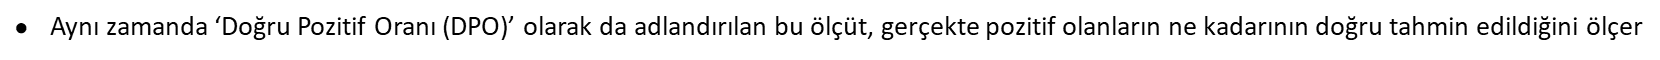
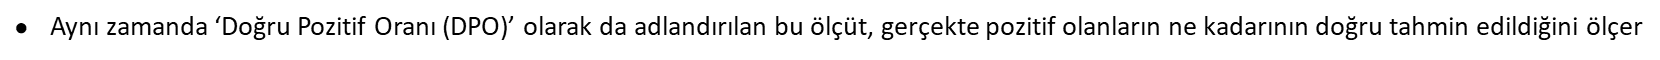
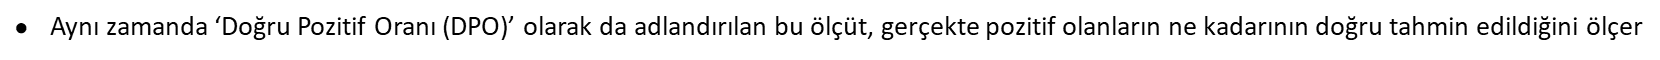
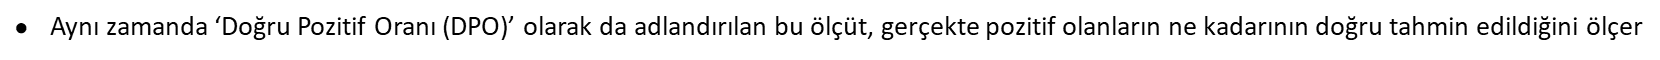

### ***DECISION TREE (KARAR AĞACI) ALGORİTMASI***

Modelimizi inşa edelim ve eğitelim.

In [ ]:
cart = DecisionTreeClassifier(random_state = 42, criterion='entropy')
cart_model = cart.fit(X_train, y_train)

In [ ]:
# Information Gain hesaplama için criterion='entropy'
cart_model

Parametreleri optimize etmeden kurduğumuz bu model için tahminlerde bulunalım.

In [ ]:
# X_test'i vererek y_test'i tahmin etmesini isteyelim.
y_pred = cart_model.predict(X_test)
y_pred

Daha önce hiç görmediği 'X_test' verileri için bulunduğu tahminlere göre doğruluk skorunu görüntüleyelim.

In [ ]:
accuracy_score(y_test, y_pred)

Şimdi Decision Tree modelimiz için karmaşıklık matrisini çizdirelim.

In [ ]:
Karmasiklik_Matrisi = confusion_matrix(y_test, y_pred)
Karmasiklik_Matrisi

Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım. (Cross Validation)

In [ ]:
cross_val_score(cart_model, X, y, cv = 10)

In [ ]:
cross_val_score(cart_model, X, y, cv = 10).mean()

Hedef özniteliğin değerlerine göre sınıflandırma raporunu görüntüleyelim.

In [ ]:
print(classification_report(y_test, y_pred))

Modelimizin karar ağacının nasıl göründüğüne bakalım.

In [ ]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(cart, out_file = None, feature_names = X.columns, filled = True))
display(SVG(graph.pipe(format = 'svg')))

> Modelin karar ağacını oluştururken root node için RAM özniteliğine dayanarak karar verdiğini görüyoruz. 

Şimdi özniteliklerin karar ağacına göre önem sıralamasına bakalım.

In [ ]:
ranking = cart.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.figure(figsize = (10, 6))
plt.title("Karar Ağacına Göre Özniteliklerin Önem Derecesi", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="lime", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

### ***K NEAREST NEIGHBOR (EN YAKIN KOMŞU) ALGORİTMASI***

Veri çerçevemizi bağımlı ve bağımsız olarak bölütleyip, eğitim ve test olarak da parçalamıştık. Şimdi aynı eğitim verileri üzerinden KNN modeli kuralım ve eğitelim.

In [ ]:
knn_params = {"n_neighbors": np.arange(2,50)}

En yakın komşu sayısını 2 ile 50 arasında hepsini deneyecek.

In [ ]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 3)
knn_cv.fit(X_train, y_train)

In [ ]:
print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi komşu değeri : 11. Şimdi modeli eğitelim.

In [ ]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [ ]:
#X_test'i vererek y_test'i tahmin etmesini isteyelim.
y_pred = knn_tuned.predict(X_test)
y_pred

In [ ]:
accuracy_score(y_test, y_pred)

Şimdi KNN modelimiz için karmaşıklık matrisini görüntüleyelim.

In [ ]:
Karmasiklik_Matrisi = confusion_matrix(y_test, y_pred)
Karmasiklik_Matrisi

Modeli farklı gözlemlerle kombinleyerek tekrardan skorunu hesaplayalım.

In [ ]:
cross_val_score(knn_tuned, X_test, y_test, cv = 10)

In [ ]:
cross_val_score(knn_tuned, X_test, y_test, cv = 10).mean()

Modelin k değerini nasıl seçtiğini görüntülemek için, 50 adet k değeri için doğruluk skorlarını görselleştirelim.

In [ ]:
score_list = []

for each in range(2,50):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test, y_test))
    
plt.plot(range(2,50),score_list)
plt.xlabel("k değerleri")
plt.ylabel("doğruluk skoru")
plt.show()

Hedef özniteliğin değerlerine göre sınıflandırma raporunu görüntüleyelim.

In [ ]:
print(classification_report(y_test, y_pred))